# Basic Stock Market Analysis & Markowitz Efficient Frontier

In simple terms, if we have a set of stocks one could be interested investing in, we can use the Markowitz Optimization problem to allocate the funds to achieve the lowest amount of risk.




In [1]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up time-window for which one wants to analyze the asset/stocks
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

In the next phase, one needs to look into which kind of stocks that are interesting and potentially want to invest in

In [3]:
# Sample some stocks from the S&P 500
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']

googl = yf.download('GOOGL', start=start_date, end=end_date)
aapl = yf.download('AAPL', start=start_date, end=end_date)
msft = yf.download('MSFT', start=start_date, end=end_date)
amzn = yf.download('AMZN', start=start_date, end=end_date)
tsla = yf.download('TSLA', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Fetch closing price for each stock and concatinate into one dataframe
df = pd.concat([googl['Close'], aapl['Close'], msft['Close'], amzn['Close'], tsla['Close']], axis=1)
df

Ticker,GOOGL,AAPL,MSFT,AMZN,TSLA
Date,,,,,
2023-01-03 00:00:00+00:00,89.120003,125.070000,239.580002,85.820000,108.099998
2023-01-04 00:00:00+00:00,88.080002,126.360001,229.100006,85.139999,113.639999
2023-01-05 00:00:00+00:00,86.199997,125.019997,222.309998,83.120003,110.339996
2023-01-06 00:00:00+00:00,87.339996,129.619995,224.929993,86.080002,113.059998
2023-01-09 00:00:00+00:00,88.019997,130.149994,227.119995,87.360001,119.769997
...,...,...,...,...,...
2023-12-22 00:00:00+00:00,141.490005,193.600006,374.579987,153.419998,252.539993
2023-12-26 00:00:00+00:00,141.520004,193.050003,374.660004,153.410004,256.609985
2023-12-27 00:00:00+00:00,140.369995,193.149994,374.070007,153.339996,261.440002


In [5]:
df = df.reset_index()
df

Ticker,Date,GOOGL,AAPL,MSFT,AMZN,TSLA
0,2023-01-03 00:00:00+00:00,89.120003,125.070000,239.580002,85.820000,108.099998
1,2023-01-04 00:00:00+00:00,88.080002,126.360001,229.100006,85.139999,113.639999
2,2023-01-05 00:00:00+00:00,86.199997,125.019997,222.309998,83.120003,110.339996
3,2023-01-06 00:00:00+00:00,87.339996,129.619995,224.929993,86.080002,113.059998
4,2023-01-09 00:00:00+00:00,88.019997,130.149994,227.119995,87.360001,119.769997
...,...,...,...,...,...,...
245,2023-12-22 00:00:00+00:00,141.490005,193.600006,374.579987,153.419998,252.539993
246,2023-12-26 00:00:00+00:00,141.520004,193.050003,374.660004,153.410004,256.609985
247,2023-12-27 00:00:00+00:00,140.369995,193.149994,374.070007,153.339996,261.440002
248,2023-12-28 00:00:00+00:00,140.229996,193.580002,375.279999,153.380005,253.179993


In [6]:
print(df.columns)
df = df.rename_axis(None, axis=1)
df

Index(['Date', 'GOOGL', 'AAPL', 'MSFT', 'AMZN', 'TSLA'], dtype='object', name='Ticker')


,Date,GOOGL,AAPL,MSFT,AMZN,TSLA
0,2023-01-03 00:00:00+00:00,89.120003,125.070000,239.580002,85.820000,108.099998
1,2023-01-04 00:00:00+00:00,88.080002,126.360001,229.100006,85.139999,113.639999
2,2023-01-05 00:00:00+00:00,86.199997,125.019997,222.309998,83.120003,110.339996
3,2023-01-06 00:00:00+00:00,87.339996,129.619995,224.929993,86.080002,113.059998
4,2023-01-09 00:00:00+00:00,88.019997,130.149994,227.119995,87.360001,119.769997
...,...,...,...,...,...,...
245,2023-12-22 00:00:00+00:00,141.490005,193.600006,374.579987,153.419998,252.539993
246,2023-12-26 00:00:00+00:00,141.520004,193.050003,374.660004,153.410004,256.609985
247,2023-12-27 00:00:00+00:00,140.369995,193.149994,374.070007,153.339996,261.440002
248,2023-12-28 00:00:00+00:00,140.229996,193.580002,375.279999,153.380005,253.179993


In [7]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [8]:
df.set_index('Date', inplace=True)
df

,GOOGL,AAPL,MSFT,AMZN,TSLA
Date,,,,,
2023-01-03,89.120003,125.070000,239.580002,85.820000,108.099998
2023-01-04,88.080002,126.360001,229.100006,85.139999,113.639999
2023-01-05,86.199997,125.019997,222.309998,83.120003,110.339996
2023-01-06,87.339996,129.619995,224.929993,86.080002,113.059998
2023-01-09,88.019997,130.149994,227.119995,87.360001,119.769997
...,...,...,...,...,...
2023-12-22,141.490005,193.600006,374.579987,153.419998,252.539993
2023-12-26,141.520004,193.050003,374.660004,153.410004,256.609985
2023-12-27,140.369995,193.149994,374.070007,153.339996,261.440002


With the dataframe now cleaned up, we want to compute the returns which is done using the following formula:

$$r_{t} = \frac{p_{t}}{p_{t-1}}$$

In [9]:
returns = df/df.shift(1)
returns

,GOOGL,AAPL,MSFT,AMZN,TSLA
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.988330,1.010314,0.956257,0.992076,1.051249
2023-01-05,0.978656,0.989395,0.970362,0.976274,0.970961
2023-01-06,1.013225,1.036794,1.011785,1.035611,1.024651
2023-01-09,1.007786,1.004089,1.009736,1.014870,1.059349
...,...,...,...,...,...
2023-12-22,1.007620,0.994453,1.002784,0.997270,0.992299
2023-12-26,1.000212,0.997159,1.000214,0.999935,1.016116
2023-12-27,0.991874,1.000518,0.998425,0.999544,1.018822


### Log-Returns

We now use the log-returns which can be defined by:

$$\log{r_{t}} = \log{\frac{p_{t}}{p_{t-1}}}$$

We use this to scale the returns, which through this gives a more fair representation of the actual returns.

In [10]:
returns = returns.dropna()
logReturns = np.log(returns)
logReturns

,GOOGL,AAPL,MSFT,AMZN,TSLA
Date,,,,,
2023-01-04,-0.011738,0.010261,-0.044729,-0.007955,0.049979
2023-01-05,-0.021575,-0.010661,-0.030086,-0.024012,-0.029469
2023-01-06,0.013138,0.036133,0.011716,0.034992,0.024352
2023-01-09,0.007756,0.004081,0.009689,0.014760,0.057655
2023-01-10,0.004534,0.004447,0.007588,0.028327,-0.007711
...,...,...,...,...,...
2023-12-22,0.007591,-0.005563,0.002780,-0.002734,-0.007731
2023-12-26,0.000212,-0.002845,0.000214,-0.000065,0.015988
2023-12-27,-0.008159,0.000518,-0.001576,-0.000456,0.018647


### Sharpe Ratio

The sharpe ratio is a ratio which is correspondent to the portfolio that we are looking into, and is defined as follows:

$$SR(w) = \frac{R(w)-R_f}{\sigma(w)}$$

$$w = [w_1 w_2 w_3 w_4 w_5]$$


The weights, $w$ shows us how much of the budget we should allocate to each stock. The sum of all the weights, $w_{1->5}$, should equal 1.

Since we are looking for max($SR(w)$) and $R_f$ is common for all $w$'s, then we shall compute:

$$R(w) = w^{T} \cdot \log{(r)}$$

$$\sigma(w) = \sqrt{w^{T} \cdot cov(w)}$$

$$SR(w) \sim  \frac{w^{T} \cdot \log{(r)}}{\sqrt{w^{T} \cdot cov(w)}}$$

### Return vs. Volatility Chart
Want to generate as many different portfolios as possible in order to see which one that is the best.

In [11]:
# We chose a random number of portfolios we want to investigate
n_portfolios = 1000000
weight_v = np.zeros((n_portfolios, len(tickers)))
returns_v = np.zeros(n_portfolios)
risk_v = np.zeros(n_portfolios)
sharpe_v = np.zeros(n_portfolios)

# For faster computation
meanlogReturn = logReturns.mean() * 252
covMatrix = logReturns.cov() * 252

for i in range(n_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weight_v[i, :] = weights

    ## Now we want to compute the Sharpe Ratio ##

    # expected log-return
    returns_v[i] = np.sum(meanlogReturn * weights)
    # expected volatility
    risk_v[i] = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights)))
    # sharpe ratio
    sharpe_v[i] = returns_v[i] / risk_v[i]

Now we want **Sharpe Ratio Maximization**

In [12]:
maxIndex = sharpe_v.argmax()
print(maxIndex)

277887


In [13]:
weight_v[maxIndex, :]

array([0.00087784, 0.57222211, 0.16875112, 0.15750551, 0.10064342])

Now we want to create a scatterplot in which we plot the returns vs. volatility.

Text(0, 0.5, 'Returns')

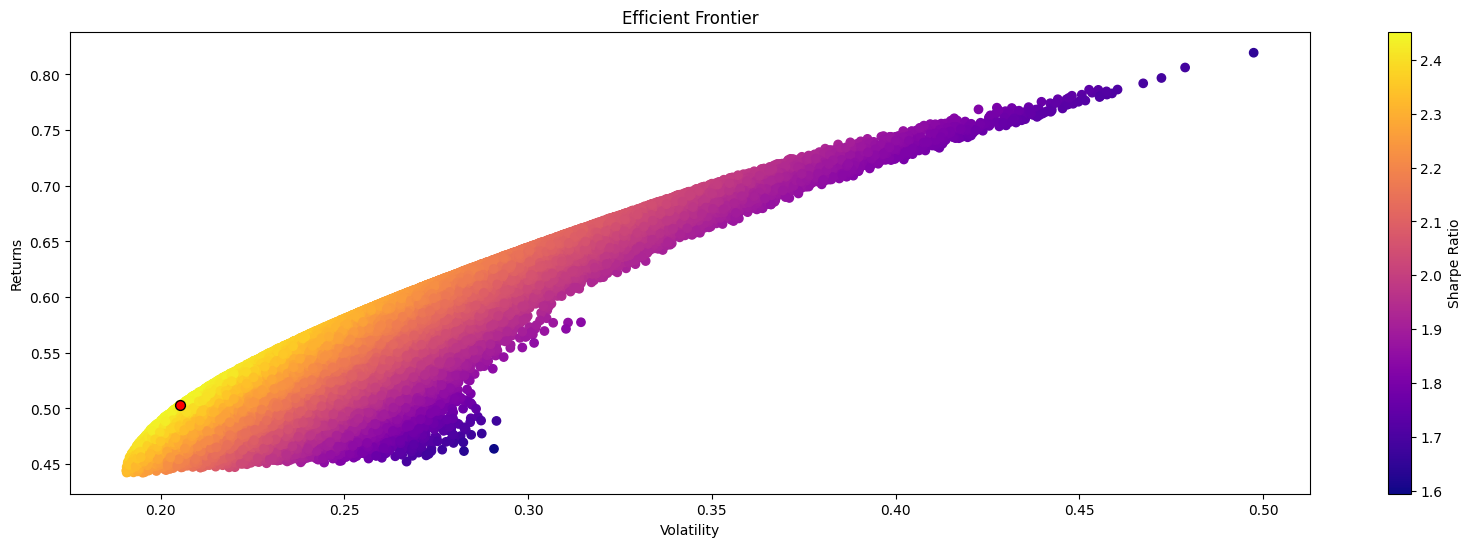

In [14]:
plt.figure(figsize=(20, 6))
plt.scatter(risk_v, returns_v, c=sharpe_v, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(risk_v[maxIndex], returns_v[maxIndex], c='red', s=50, edgecolors='black')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')

## Efficient Markowitz Frontier

Want to minimize the following:

$$\text{minimize}_{w} \quad w^{T} \Sigma w$$

Subject to the following constraints:
$$\mathbf{p}^{T} w \geq r_{\text{min}}$$
$$w \geq 0$$
$$1^{T} w = 1$$

This can be rewritten as the following:

$$\text{minimize}_{w} \quad SR(w)$$

Subject to the following constraints:
$$0 \leq w_i \leq 1, \quad i=1...5$$

In [15]:
def negative_sharpe(weights):
  w = np.array(weights)
  R = np.sum(meanlogReturn * w)
  V = np.sqrt(np.dot(w.T, np.dot(covMatrix, w)))
  return -R/V

In [16]:
w0 = [0.2, 0.2, 0.2, 0.2, 0.2]
bounds = ((0, 1) for i in range(len(tickers)))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [17]:
from scipy.optimize import minimize
w_opt = minimize(negative_sharpe, w0, method='SLSQP', bounds=bounds, constraints=constraints)
w_opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.452089473114215
       x: [ 0.000e+00  5.703e-01  1.742e-01  1.599e-01  9.558e-02]
     nit: 6
     jac: [ 1.019e-01 -5.803e-05 -3.725e-06 -5.673e-04  1.302e-03]
    nfev: 38
    njev: 6

In [18]:
w_opt.x

array([0.        , 0.57027503, 0.17421383, 0.15992896, 0.09558217])

We see that using the Markowitz approach converges towards similar values but in a faster fashion.